<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by <a href="http://abu.lu.lv" target="_blank">Abuzer Yakaryilmaz</a> (<a href="http://qworld.lu.lv/index.php/qlatvia/" target="_blank">QLatvia</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h2> <font color="blue"> Solutions for </font>Phase Kickback</h2>

<a id="task1"></a>
<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

<h3> Solution </h3>

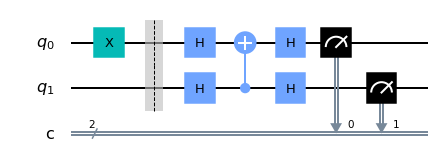

{'11': 100}


In [1]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the up qubit is in |0>

# set the down qubit to |1>
qc.x(q[0]) # apply x-gate (NOT operator)

qc.barrier()

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
qc.cx(1,0)

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# measure both qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl'))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

<a id="task2"></a>
<h3> Task 2 </h3>

Create a curcuit with 7 qubits, say $ q[6],\ldots,q[0] $ in the reading order of Qiskit.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$) 
<br>
Apply CNOT operator ($q[4]$,$q[0]$) 
<br>
Apply CNOT operator ($q[5]$,$q[0]$) 

Apply Hadamard operators to all qubits.

Measure all qubits. 

For each CNOT operator, is there a phase-kickback effect?

<h3> Solution </h3>

In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# Create a circuit with 7 qubits.
q =  QuantumRegister(7,"q") # quantum register with 7 qubits
c = ClassicalRegister(7) # classical register with 7 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the top six qubits are already in |0>

# set the bottom qubit to |1>
qc.x(0) # apply x-gate (NOT operator)

# define a barrier
qc.barrier()

# apply Hadamard to all qubits.
for i in range(7):
    qc.h(q[i])

    # define a barrier
qc.barrier()


# apply CNOT operator (q[1],q[0]) 
# apply CNOT operator (q[4],q[0]) 
# apply CNOT operator (q[5],q[0]) 
qc.cx(q[1],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])

# define a barrier
qc.barrier()


# apply Hadamard to all qubits.
for i in range(7):
    qc.h(q[i])

# define a barrier
qc.barrier()

# measure all qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw())

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

┌───┐ ░ ┌───┐ ░ ┌───┐┌───┐┌───┐ ░ ┌───┐ ░ ┌─┐                  
 q_0: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├┤ X ├─░─┤ H ├─░─┤M├──────────────────
      └───┘ ░ ├───┤ ░ └─┬─┘└─┬─┘└─┬─┘ ░ ├───┤ ░ └╥┘┌─┐               
 q_1: ──────░─┤ H ├─░───■────┼────┼───░─┤ H ├─░──╫─┤M├───────────────
            ░ ├───┤ ░        │    │   ░ ├───┤ ░  ║ └╥┘┌─┐            
 q_2: ──────░─┤ H ├─░────────┼────┼───░─┤ H ├─░──╫──╫─┤M├────────────
            ░ ├───┤ ░        │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐         
 q_3: ──────░─┤ H ├─░────────┼────┼───░─┤ H ├─░──╫──╫──╫─┤M├─────────
            ░ ├───┤ ░        │    │   ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐      
 q_4: ──────░─┤ H ├─░────────■────┼───░─┤ H ├─░──╫──╫──╫──╫─┤M├──────
            ░ ├───┤ ░             │   ░ ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐   
 q_5: ──────░─┤ H ├─░─────────────■───░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├───
            ░ ├───┤ ░                 ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_6: ──────░─┤ H ├─░─────────────────░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├
            ░ └───┘ ░                 ░ └───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘
c0: 7/═══════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩═
                                                 0  1  2  3  4  5  6

{'0110011': 100}
